# Data Science Lab - Task 1

> Author: Alexandre Charoy, 448140
>
> Version 2
>
> Date: 10.04.2019

## Read data

In [23]:
import pandas as pd
from lxml import objectify

# Get columns from XML

path = '../datasets/iris/data.all.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()
header = root.column_header

columns = []

for elt in header.getchildren():
    columns.append({'name': elt.get('name'), 'type': elt.get('type')})

names = [c['name'] for c in columns]

# Get data table

table = pd.read_csv('../datasets/iris/data.all', sep=' ', header=None, names=names)

### Filter data per class

In [24]:
table_setosa      = table[table['Class'].str.contains('setosa')]
table_versicolora = table[table['Class'].str.contains('versicolor')]
table_virginica   = table[table['Class'].str.contains('virginica')]

## Statistics

In [28]:
stats = []

for name in names:
    if (name == 'Class'):
        continue
    column = table[name]
    stats.append({'min': column.min(), 'max': column.max(), 'mean': column.mean()})

statsdf = pd.DataFrame(stats, index=names[:-1])
print(statsdf)

              max      mean  min
Sepal-length  7.9  5.843333  4.3
Sepal-width   4.4  3.057333  2.0
Petal-length  6.9  3.758000  1.0
Petal-width   2.5  1.199333  0.1


## Scatter plots

### Sepal values

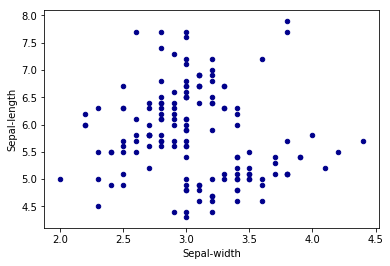

In [9]:
table.plot.scatter(x=names[1], y=names[0], color='DarkBlue');

### Sepal values per class

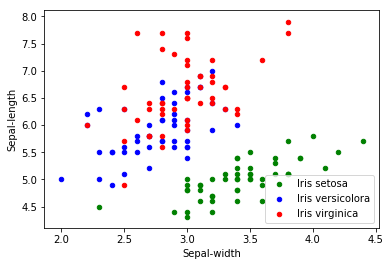

In [5]:
plot_sepal = table_setosa.plot.scatter(x=names[1], y=names[0], label='Iris setosa', color='Green');
table_versicolora.plot.scatter(ax = plot_sepal, x=names[1], y=names[0], label='Iris versicolora', color='Blue');
table_virginica.plot.scatter(ax = plot_sepal, x=names[1], y=names[0], label='Iris virginica', color='Red');

### Petal values

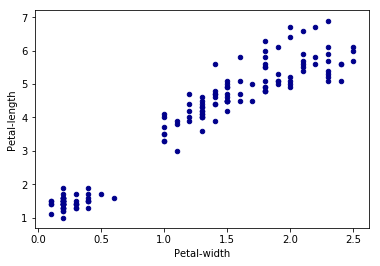

In [6]:
table.plot.scatter(x=names[3], y=names[2], color='DarkBlue');

### Petal values per class

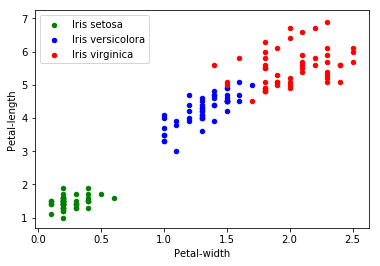

In [18]:
plot_petal = table_setosa.plot.scatter(x=names[3], y=names[2], label='Iris setosa', color='Green');
table_versicolora.plot.scatter(ax = plot_petal, x=names[3], y=names[2], label='Iris versicolora', color='Blue');
table_virginica.plot.scatter(ax = plot_petal, x=names[3], y=names[2], label='Iris virginica', color='Red');

## Scatter matrix

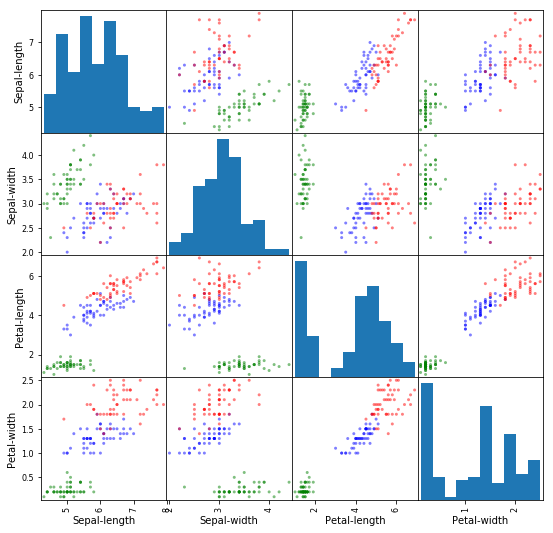

In [26]:
color_map = {"Iris-setosa": "Green", 
               "Iris-versicolor": "Blue", 
               "Iris-virginica": "Red"}
              
colors = table["Class"].map(lambda x: color_map.get(x))

pd.plotting.scatter_matrix(table, color=colors, figsize=(9, 9));

## Box plot

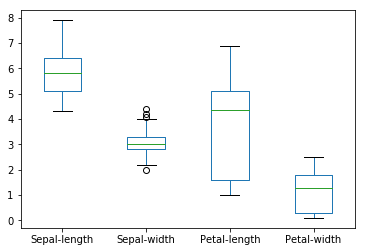

In [27]:
table.plot.box()

## Conclusions

The input data set gives sepal and petal dimensions for Iris flowers of three different species.

### Data Quality

Analysing the data set while ignoring the three different classes of values can lead to bad conclusions. The [petal values](#Petal-values) scatter plot for example gives the impression that there are values missing in the input data set. One might be tempted to impute them - for example with mean substitution. But filtering input values by classes as done in the [petal values per class](#Petal-values-per-class) plot shows that the values are actually grouped for each class observed, and the hole observed in the first plot is due to the differences in different types of Iris flowers.

### Classification

Despite the small size of the data set, vizuaalisations like the [scatter matrix](#Scatter-matrix) allow to show differences between the different classes. Especially samples of the Iris Setosa class can clearly be delimited. This data set could therefore be used for classification with relative reliability, but a bigger data set would be better.